In [36]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from IPython import display

In [2]:
x,sr = librosa.load('voice.wav', sr = 16000)    

In [41]:
display.Audio(x, rate=sr)

In [6]:
len(x), sr, len(x)/sr

(48944, 16000, 3.059)

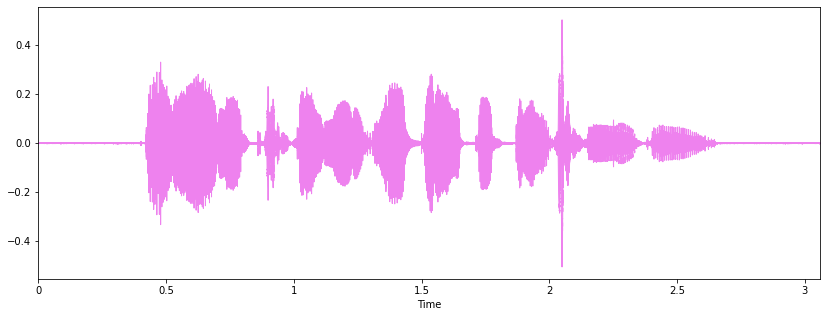

In [5]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr, color='violet')

fft_shape:(48944,), magnitude_shape:(48944,), f_shape:(48944,)


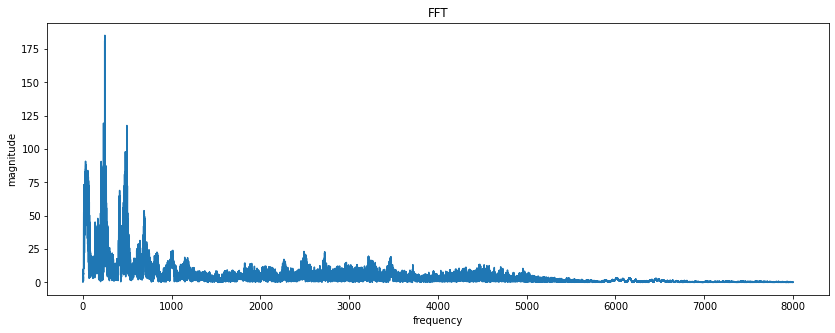

In [13]:
fft = np.fft.fft(x)
magnitude = np.abs(fft)
f = np.linspace(0, sr, len(magnitude))
left_spectrum = magnitude[:int(len(magnitude)/2)]
left_f = f[:int(len(magnitude)/2)]

plt.figure(figsize=(14,5))
plt.plot(left_f, left_spectrum)
plt.xlabel('frequency')
plt.ylabel('magnitude')
plt.title('FFT')
print(f"fft_shape:{fft.shape}, magnitude_shape:{magnitude.shape}, f_shape:{f.shape}")

(65, 765)


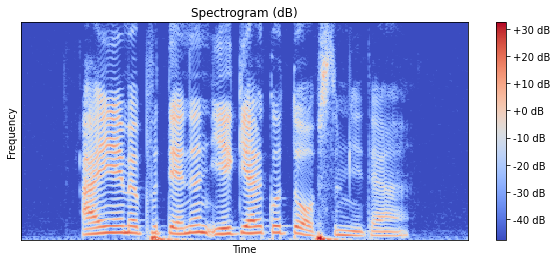

In [30]:
stft = librosa.stft(x, n_fft=512, hop_length=128, win_length=512)

magnitude = np.abs(stft)
log_spectrogram = librosa.amplitude_to_db(magnitude)

plt.figure(figsize=(10,4))
librosa.display.specshow(log_spectrogram, sr=16000, hop_length=64)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram (dB)")
print(y.shape)

In [23]:
(len(x)/sr)*(256/len(x))

0.016

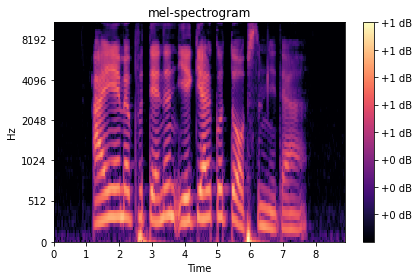

(80, 383)


In [31]:
min_level_db=-100
def normalize_mel(s):
    return np.clip((s-min_level_db)/-min_level_db, 0,1)

def feature_extraction(x):
    mel = librosa.feature.melspectrogram(y=x, n_mels=80, n_fft=512, win_length=512, hop_length=128) 
    norm_log_s = normalize_mel(librosa.power_to_db(mel, ref=np.max))
    
    return norm_log_s

a = feature_extraction(x)
librosa.display.specshow(a, y_axis='mel', x_axis='time')

plt.colorbar(format='%+2.0f dB')
plt.title('mel-spectrogram')
plt.tight_layout()
plt.show()
print(a.shape)